<a href="https://colab.research.google.com/github/gumberankush/AI-DataScience-Course/blob/main/Deep%20Learning/LinearRegression_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### TensorFlow 2.0 is an extensive redesign of TensorFlow and Keras that takes into account over four years of user feedback and technical progress.
---

TensorFlow 2.0 is built on the following key ideas:

- Let users run their computation eagerly, like they would in Numpy. This makes TensorFlow 2.0 programming intuitive and Pythonic.
- Preserve the considerable advantages of compiled graphs (for performance, distribution, and deployment). This makes TensorFlow fast, scalable, and production-ready.
- Leverage Keras as its high-level deep learning API, making TensorFlow approachable and highly productive.
- Extend Keras into a spectrum of workflows ranging from the very high-level (easier to use, less flexible) to the very low-level (requires more expertise, but provides great flexibility).


### Easy model building
TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.

If you need more flexibility, eager execution allows for immediate iteration and intuitive debugging. For large ML training tasks, use the Distribution Strategy API for distributed training on different hardware configurations without changing the model definition.

In [1]:
import tensorflow as tf
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.5.0


##Linear Regression with TensorFlow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
g1 = tf.random.Generator.from_seed(42)
k = g1.normal(shape=[100, 1])

In [4]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        input_dim = 2
        output_dim = 1
        self.learning_rate = 0.01  # subject to change

        # This is our weight matrix
        self.w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))  # parameters, equal to theta
        # This is our bias vector
        self.b = tf.Variable(tf.zeros(shape=(output_dim,)))  # intercept

    def __call__(self, x):
        return self.w * x + self.b

In [5]:
x1 = tf.linspace(-10.0, 10.0, 100)[:, np.newaxis]
x2 = tf.linspace(100.0, 200.0, 100)[:, np.newaxis]
y = 2.0 * x1 + 0.4 * x2 + 10 * g1.normal(shape=[100, 1])

In [6]:
# scaling - As other feature is in range of 10's
x2 /= np.max(x2)
# tolerance
tol = 1e-3

In [7]:
dataset = tf.concat((x1, x2), axis=1)

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(dataset.numpy(), y.numpy())

X_train, X_test = tf.constant(X_train), tf.constant(X_test)
y_train, y_test = tf.constant(y_train), tf.constant(y_test)

In [10]:
def compute_predictions(features):  # define hypothesis
    return tf.matmul(features, model.w) + model.b


def compute_loss(labels, predictions):  # define MSE
    return tf.reduce_mean(tf.square(labels - predictions))


def train(x, y):  # training and updating through GD updates
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)  # y_pred or y hat
        loss = compute_loss(y, predictions)  # loss returned
        dloss_dw, dloss_db = tape.gradient(loss, [model.w, model.b])  # gradient w.r.t. w and b
    model.w.assign_sub(model.learning_rate * dloss_dw)  # reassign weights
    model.b.assign_sub(model.learning_rate * dloss_db)  # reassign bias
    return loss

def R_squared(y, y_pred):
    '''
    R_squared computes the coefficient of determination.
    It is a measure of how well the observed outcomes are replicated by the model.
    '''
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

Iteration: 10 - Error: 2063.0461
Updated Weights : 3.9152, 8.3960
Iteration: 20 - Error: 1153.5321
Updated Weights : 3.8237, 13.9585
Iteration: 30 - Error: 671.2892
Updated Weights : 3.7570, 18.0088
Iteration: 40 - Error: 415.5942
Updated Weights : 3.7084, 20.9582
Iteration: 50 - Error: 280.0193
Updated Weights : 3.6731, 23.1058
Iteration: 60 - Error: 208.1346
Updated Weights : 3.6473, 24.6696
Iteration: 70 - Error: 170.0199
Updated Weights : 3.6286, 25.8083
Iteration: 80 - Error: 149.8107
Updated Weights : 3.6149, 26.6374
Iteration: 90 - Error: 139.0954
Updated Weights : 3.6050, 27.2412
Iteration: 100 - Error: 133.4139
Updated Weights : 3.5977, 27.6809
Iteration: 110 - Error: 130.4014
Updated Weights : 3.5925, 28.0010
Iteration: 120 - Error: 128.8041
Updated Weights : 3.5886, 28.2341
Iteration: 130 - Error: 127.9572
Updated Weights : 3.5858, 28.4038
Iteration: 140 - Error: 127.5082
Updated Weights : 3.5838, 28.5274
Iteration: 150 - Error: 127.2701
Updated Weights : 3.5823, 28.6174
Ite

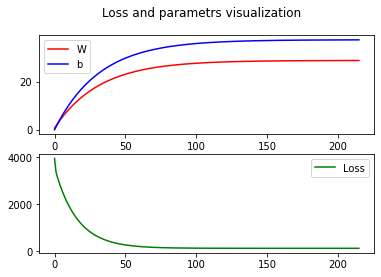

In [22]:
model = MyModel()
model.variables
iterations = 1
    # Collect the history of W-values and b-values to plot later
ws, bs, loss_ls = [], [], []
ws.append(model.w.numpy())
bs.append(model.b.numpy())

while True:
    new_loss = train(X_train, y_train)
    loss_ls.append(new_loss.numpy())

    if tf.reduce_sum(tf.abs(ws[-1] - model.w.numpy())) < tol:
        print("Converged at iteration %d" % iterations)
        break

    ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, new_loss.numpy()))
        print("Updated Weights : %.4f, %.4f" % (ws[-1][0], ws[-1][1]))
    iterations += 1

Ws = np.array(ws)
Bs = np.array(bs)
epochs = range(iterations)

y_pred_train = tf.matmul(X_train, Ws[-1]) + Bs[-1]
y_pred_test = tf.matmul(X_test, Ws[-1]) + Bs[-1]

model_r2_train = R_squared(y_train, y_pred_train)
model_r2_test = R_squared(y_test, y_pred_test)
print("R2 score for training data is %.4f" % (model_r2_train.numpy()))
print("R2 score for test data is %.4f" % (model_r2_test.numpy()))

fig, axs = plt.subplots(2)
fig.suptitle('Loss and parametrs visualization')
axs[0].plot(epochs, Ws[:, 1].flatten(), "r",
            epochs, Bs[:, 0].flatten(), "b")
axs[0].legend(["W", "b"])
plt.legend(["W", "b"])
axs[1].plot(epochs, np.array(loss_ls), "g")
plt.legend(["Loss"])

plt.show()